# Exploring OLS, Lasso and Random Forest in a regression task.


In [1]:
#adopted from github.com/Yorko/mlcourse.ai/

In [2]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     train_test_split, RandomizedSearchCV)
from sklearn.preprocessing import StandardScaler
import seaborn as sns

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

**We are working with UCI Wine quality dataset**

In [3]:
data = pd.read_csv("winequality-white.csv", sep=";")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
sns.pairplot(data)

NameError: name 'sns' is not defined

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),annot=True,linewidths=2)

NameError: name 'sns' is not defined

<Figure size 864x648 with 0 Axes>

**Separate the target feature, split data in 7:3 proportion (30% form a holdout set, use random_state=17), and preprocess data with `StandardScaler`.**

In [8]:
y = data["quality"]
X = data.drop("quality", axis=1)

X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

NameError: name 'train_test_split' is not defined

## Linear regression

**Train a simple linear regression model (Ordinary Least Squares).**

In [9]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train);

NameError: name 'LinearRegression' is not defined

**What are mean squared errors of model predictions on train and holdout sets?**

In [10]:
print(
    "Mean squared error (train): %.3f"
    % mean_squared_error(y_train, linreg.predict(X_train_scaled))
)
print(
    "Mean squared error (test): %.3f"
    % mean_squared_error(y_holdout, linreg.predict(X_holdout_scaled))
)

NameError: name 'mean_squared_error' is not defined

In [11]:
from sklearn.metrics import r2_score

#print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))
print(
    "R-squared value  (train): %.3f"
    % round(r2_score(y_train, linreg.predict(X_train_scaled)),3)
)
print(
    "R-squared value  (test): %.3f"
    % round(r2_score(y_holdout, linreg.predict(X_holdout_scaled)),3)
)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

**Sort features by their influence on the target feature (wine quality). Beware that both large positive and large negative coefficients mean large influence on target. It's handy to use `pandas.DataFrame` here.**

Which feature this linear regression model treats as the most influential on wine quality?

In [12]:
linreg_coef = pd.DataFrame(
    {"coef": linreg.coef_, "coef_abs": np.abs(linreg.coef_)},
    index=data.columns.drop("quality"),
)
linreg_coef.sort_values(by="coef_abs", ascending=False)

,coef,coef_abs
density,-0.665720,0.665720
residual sugar,0.538164,0.538164
volatile acidity,-0.192260,0.192260
pH,0.150036,0.150036
alcohol,0.129533,0.129533
fixed acidity,0.097822,0.097822
sulphates,0.062053,0.062053
free sulfur dioxide,0.042180,0.042180
total sulfur dioxide,0.014304,0.014304
chlorides,0.008127,0.008127


## Lasso regression

**Train a LASSO model with $\alpha = 0.01$ (weak regularization) and scaled data. Again, set random_state=17.**

In [13]:
lasso1 = Lasso(alpha=0.01, random_state=17)
lasso1.fit(X_train_scaled, y_train)

Lasso(alpha=0.01, random_state=17)

**Which feature is the least informative in predicting wine quality, according to this LASSO model?**

In [14]:
lasso1_coef = pd.DataFrame(
    {"coef": lasso1.coef_, "coef_abs": np.abs(lasso1.coef_)},
    index=data.columns.drop("quality"),
)
lasso1_coef.sort_values(by="coef_abs", ascending=False)

,coef,coef_abs
alcohol,0.322425,0.322425
residual sugar,0.256363,0.256363
density,-0.235492,0.235492
volatile acidity,-0.188479,0.188479
pH,0.067277,0.067277
free sulfur dioxide,0.043088,0.043088
sulphates,0.029722,0.029722
chlorides,-0.002747,0.002747
fixed acidity,-0.000000,0.000000
citric acid,-0.000000,0.000000


In [15]:
print(
    "Mean squared error (train): %.3f"
    % mean_squared_error(y_train, lasso1.predict(X_train_scaled))
)
print(
    "Mean squared error (test): %.3f"
    % mean_squared_error(y_holdout, lasso1.predict(X_holdout_scaled))
)

Mean squared error (train): 0.564
Mean squared error (test): 0.574


In [16]:
from sklearn.metrics import r2_score

#print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))
print(
    "R-squared value  (train): %.3f"
    % round(r2_score(y_train, lasso1.predict(X_train_scaled)),3)
)
print(
    "R-squared value  (test): %.3f"
    % round(r2_score(y_holdout, lasso1.predict(X_holdout_scaled)),3)
)

R-squared value  (train): 0.283
R-squared value  (test): 0.263


**Train LassoCV with random_state=17 to choose the best value of $\alpha$ in 5-fold cross-validation.**

In [18]:
alphas = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(random_state=17, cv=5, alphas=alphas)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522552e-06,
       6.36824994e-06, 6.98587975e-0...
       1.18953407e+01, 1.30490198e+01, 1.43145894e+01, 1.57029012e+01,
       1.72258597e+01, 1.88965234e+01, 2.07292178e+01, 2.27396575e+01,
       2.49450814e+01, 2.73644000e+01, 3.00183581e+01, 3.29297126e+01,
       3.61234270e+01, 3.96268864e+01, 4.34701316e+01, 4.76861170e+01,
       5.23109931e+01, 5.73844165e+01, 6.29498899e+01, 6.90551352e+01,
       7.57525026e+01, 8.30994195e+01, 9.11588830e+01, 1.00000000e+02]),
        cv=5, random_state=17)

In [19]:
lasso_cv.alpha_

0.0002833096101839324

**Which feature is the least informative in predicting wine quality, according to the tuned LASSO model?**

In [20]:
lasso_cv_coef = pd.DataFrame(
    {"coef": lasso_cv.coef_, "coef_abs": np.abs(lasso_cv.coef_)},
    index=data.columns.drop("quality"),
)
lasso_cv_coef.sort_values(by="coef_abs", ascending=False)

,coef,coef_abs
density,-0.648161,0.648161
residual sugar,0.526883,0.526883
volatile acidity,-0.192049,0.192049
pH,0.146549,0.146549
alcohol,0.137115,0.137115
fixed acidity,0.093295,0.093295
sulphates,0.060939,0.060939
free sulfur dioxide,0.042698,0.042698
total sulfur dioxide,0.012969,0.012969
chlorides,0.006933,0.006933


**What are mean squared errors of tuned LASSO predictions on train and holdout sets?**

In [21]:
print(
    "Mean squared error (train): %.3f"
    % mean_squared_error(y_train, lasso_cv.predict(X_train_scaled))
)
print(
    "Mean squared error (test): %.3f"
    % mean_squared_error(y_holdout, lasso_cv.predict(X_holdout_scaled))
)

Mean squared error (train): 0.558
Mean squared error (test): 0.583


In [22]:
print(
    "R-squared value  (train): %.3f"
    % round(r2_score(y_train, lasso_cv.predict(X_train_scaled)),3)
)
print(
    "R-squared value  (test): %.3f"
    % round(r2_score(y_holdout, lasso_cv.predict(X_holdout_scaled)),3)
)

R-squared value  (train): 0.290
R-squared value  (test): 0.251


## Random Forest

**Train a Random Forest with out-of-the-box parameters, setting only random_state to be 17.**

In [23]:
forest = RandomForestRegressor(n_estimators=50, random_state=17)
forest.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=50, random_state=17)

**What are mean squared errors of RF model on the training set, in cross-validation (cross_val_score with scoring='neg_mean_squared_error' and other arguments left with default values) and on holdout set?**

In [24]:
print(
    "Mean squared error (train): %.3f"
    % mean_squared_error(y_train, forest.predict(X_train_scaled))
)
print(
    "Mean squared error (cv): %.3f"
    % np.mean(
        np.abs(
            cross_val_score(
                forest, X_train_scaled, y_train, scoring="neg_mean_squared_error"
            )
        )
    )
)
print(
    "Mean squared error (test): %.3f"
    % mean_squared_error(y_holdout, forest.predict(X_holdout_scaled))
)

Mean squared error (train): 0.055
Mean squared error (cv): 0.419
Mean squared error (test): 0.374


**Tune the `max_features` and `max_depth` hyperparameters with GridSearchCV and again check mean cross-validation MSE and MSE on holdout set.**

In [25]:
forest_params = {"max_depth": list(range(10, 25)), "max_features": list(range(6, 12))}

locally_best_forest = GridSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=17),
    forest_params,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    cv=5,
    verbose=True,
)
locally_best_forest.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20, 21, 22, 23, 24],
                         'max_features': [6, 7, 8, 9, 10, 11]},
             scoring='neg_mean_squared_error', verbose=True)

In [26]:
locally_best_forest.best_params_, locally_best_forest.best_score_

({'max_depth': 21, 'max_features': 6}, -0.39773288191505934)

**What are mean squared errors of tuned RF model in cross-validation (cross_val_score with scoring='neg_mean_squared_error' and other arguments left with default values) and on holdout set?**

In [27]:
print(
    "Mean squared error (cv): %.3f"
    % np.mean(
        np.abs(
            cross_val_score(
                locally_best_forest.best_estimator_,
                X_train_scaled,
                y_train,
                scoring="neg_mean_squared_error",
            )
        )
    )
)
print(
    "Mean squared error (test): %.3f"
    % mean_squared_error(y_holdout, locally_best_forest.predict(X_holdout_scaled))
)

Mean squared error (cv): 0.398
Mean squared error (test): 0.366


In [28]:
print(
    "r2_score (cv): %.3f"
    % np.mean(
        np.abs(
            cross_val_score(
                locally_best_forest.best_estimator_,
                X_train_scaled,
                y_train,
                scoring="r2",
            )
        )
    )
)
print(
    "R-squared value (test): %.3f"
    % r2_score(y_holdout, locally_best_forest.predict(X_holdout_scaled))
)

r2_score (cv): 0.494
R-squared value (test): 0.530


In [29]:
import sklearn.metrics as metrics
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall

**Output RF's feature importance. Again, it's nice to present it as a DataFrame.**<br>
**What is the most important feature, according to the Random Forest model?**

In [30]:
rf_importance = pd.DataFrame(
    locally_best_forest.best_estimator_.feature_importances_,
    columns=["coef"],
    index=data.columns[:-1],
)
rf_importance.sort_values(by="coef", ascending=False)

,coef
alcohol,0.206056
volatile acidity,0.117578
free sulfur dioxide,0.111556
density,0.088549
pH,0.073659
total sulfur dioxide,0.073640
chlorides,0.073366
residual sugar,0.072072
citric acid,0.062601
fixed acidity,0.061813


In [31]:
forest_params = {"n_estimators": list(range(10,1000,40)), "max_depth": list(range(10, 25)), "max_features": list(range(6, 12))}

locally_best_forest_R = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=17),
    forest_params,
    scoring="r2",
    n_jobs=-1,
    cv=5,
    verbose=True,
)
locally_best_forest_R.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=17),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24],
                                        'max_features': [6, 7, 8, 9, 10, 11],
                                        'n_estimators': [10, 50, 90, 130, 170,
                                                         210, 250, 290, 330,
                                                         370, 410, 450, 490,
                                                         530, 570, 610, 650,
                                                         690, 730, 770, 810,
                                                         850, 890, 930, 970]},
                   scoring='r2', verbose=True)

In [32]:
locally_best_forest_R.best_params_, locally_best_forest.best_score_

({'n_estimators': 970, 'max_features': 9, 'max_depth': 24},
 -0.39773288191505934)

In [33]:
print(
    "Mean squared error (cv): %.3f"
    % np.mean(
        np.abs(
            cross_val_score(
                locally_best_forest_R.best_estimator_,
                X_train_scaled,
                y_train,
                scoring="neg_mean_squared_error",
            )
        )
    )
)
print(
    "Mean squared error (test): %.3f"
    % mean_squared_error(y_holdout, locally_best_forest_R.predict(X_holdout_scaled))
)

Mean squared error (cv): 0.400
Mean squared error (test): 0.367


In [34]:
print(
    "r2_score (cv): %.3f"
    % np.mean(
        np.abs(
            cross_val_score(
                locally_best_forest_R.best_estimator_,
                X_train_scaled,
                y_train,
                scoring="r2",
            )
        )
    )
)
print(
    "R-squared value (test): %.3f"
    % r2_score(y_holdout, locally_best_forest_R.predict(X_holdout_scaled))
)

r2_score (cv): 0.491
R-squared value (test): 0.529


In [35]:
rf_importance = pd.DataFrame(
    locally_best_forest_R.best_estimator_.feature_importances_,
    columns=["coef"],
    index=data.columns[:-1],
)
rf_importance.sort_values(by="coef", ascending=False)

,coef
alcohol,0.227526
volatile acidity,0.122570
free sulfur dioxide,0.113225
density,0.078390
pH,0.072713
residual sugar,0.071167
total sulfur dioxide,0.069102
chlorides,0.064290
fixed acidity,0.062689
citric acid,0.059656


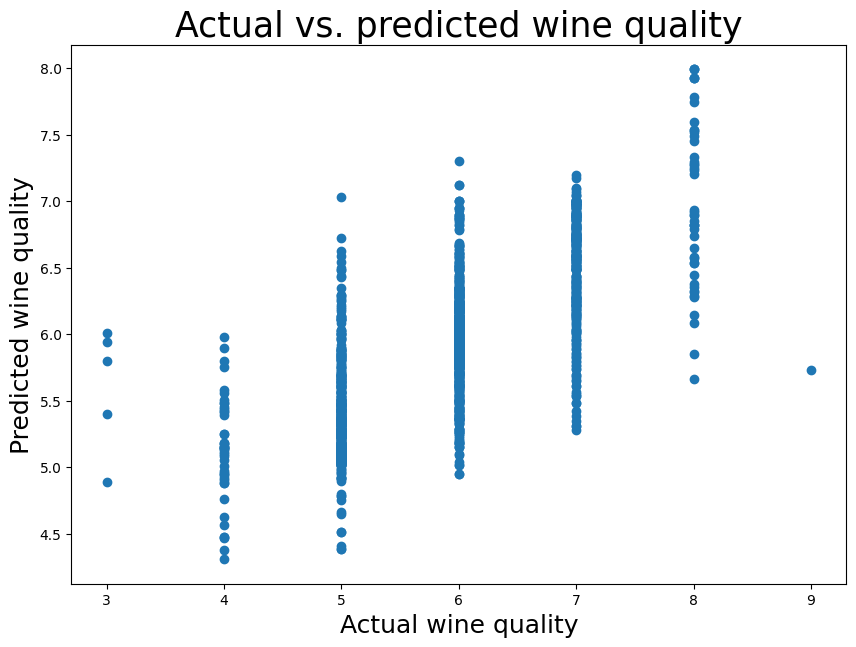

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted wine quality",fontsize=25)
plt.xlabel("Actual wine quality",fontsize=18)
plt.ylabel("Predicted wine quality", fontsize=18)
plt.scatter(x=y_holdout,y=locally_best_forest_R.predict(X_holdout_scaled))